# Loading the data of Bank statements json format in my workspace.

In [6]:
import json

filename = 'P1- BankStatements.json'
with open(filename, 'r', encoding='utf-8') as BS:
    data = json.load(BS)

# Transactional Analysis

### Total number of transactions made over the year.

In [2]:
transactions = data['Account']['Transactions']['Transaction']

total_transactions = len(transactions)
print(f"Total number of transactions made over the year: {total_transactions}")


Total number of transactions made over the year: 985


### Distribution of transaction amounts as small, medium and large.

In [3]:
small_transactions = 0
medium_transactions = 0
large_transactions = 0
# initiating the variables outside
small_threshold = 1100
medium_threshold = 2100
#setting the threshold requirements for the transactions
for transaction in transactions:
    amount = float(transaction['amount'])
    if (amount <= small_threshold):
        small_transactions += 1
    elif (amount <= medium_threshold and amount > small_threshold):
        medium_transactions += 1
    else:
        large_transactions += 1

print(f"The no. of small transactions: {small_transactions} \n"
      f"The no. of medium transactions: {medium_transactions} \n" 
      f"The no. of large_transactions: {large_transactions}")

The no. of small transactions: 845 
The no. of medium transactions: 66 
The no. of large_transactions: 74


### Analysisng the frequency of different transaction types

In [4]:
Debit = 0
Credit = 0

for transaction in transactions:
    if (transaction["type"] == "DEBIT"):
        Debit += 1
    elif (transaction["type"] == "CREDIT"):
        Credit += 1

print(f"No. of Debit transactions: {Debit} \n"
     f"No. of Credit transactions: {Credit}")

No. of Debit transactions: 695 
No. of Credit transactions: 290


## Balance Analysis

### Trend of the account balance over time.

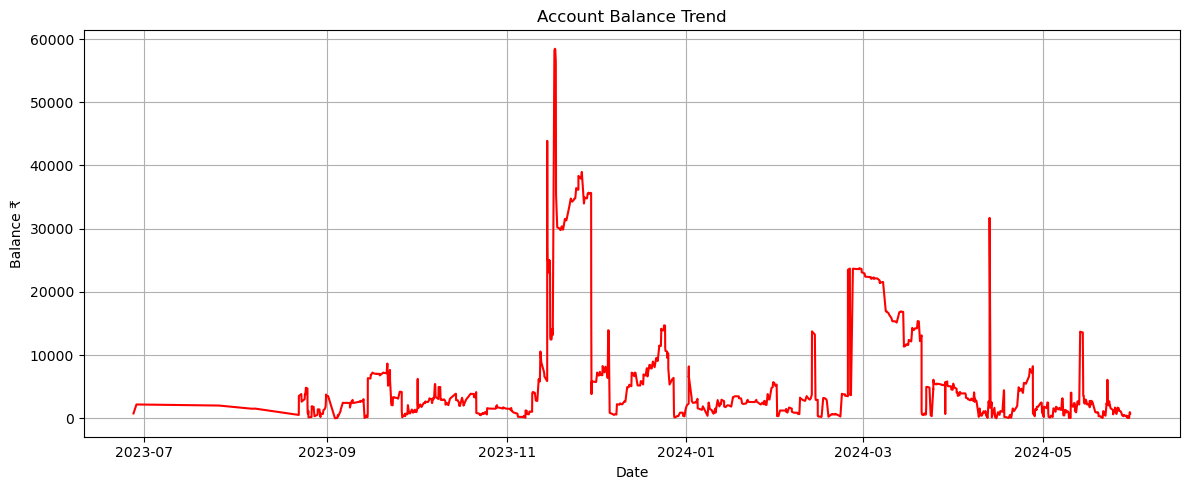

In [29]:
from datetime import datetime
import matplotlib.pyplot as plt

timestamps = []
balances = []
current_b = float(data["Account"]["Summary"]["currentBalance"])

for transaction in transactions:
    timestamp = datetime.fromisoformat(transaction['transactionTimestamp'])
    balance = float(transaction['currentBalance'])
#now as the timestamp in the data is in iso format that is why we did formisoformat
    timestamps.append(timestamp)
    balances.append(current_b)

    current_b = balance

plt.figure(figsize=(12, 5))
plt.plot(timestamps, balances, marker='', linestyle='-', color='r')
plt.title('Account Balance Trend')
plt.xlabel('Date')
plt.ylabel('Balance ₹')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identifying periods with significant changes.

Periods with significant change
At 2023-08-07 17:13:13: Balance changed to ₹525.8
At 2023-08-22 11:49:13: Balance changed to ₹3524.8
At 2023-08-23 08:17:48: Balance changed to ₹2624.8
At 2023-08-24 18:22:22: Balance changed to ₹4834.8
At 2023-08-25 10:24:38: Balance changed to ₹2244.8
At 2023-08-25 10:39:35: Balance changed to ₹794.8
At 2023-08-25 16:56:59: Balance changed to ₹175.8
At 2023-08-26 20:36:16: Balance changed to ₹1895.8
At 2023-08-27 12:19:54: Balance changed to ₹315.8
At 2023-08-28 20:27:41: Balance changed to ₹1405.8
At 2023-08-29 11:49:00: Balance changed to ₹195.8
At 2023-08-31 13:42:41: Balance changed to ₹2550.8
At 2023-08-31 16:09:10: Balance changed to ₹3750.8
At 2023-09-01 10:42:42: Balance changed to ₹0.8
At 2023-09-04 19:40:41: Balance changed to ₹1144.8
At 2023-09-05 16:38:31: Balance changed to ₹2444.8
At 2023-09-08 20:21:01: Balance changed to ₹2549.8
At 2023-09-13 10:19:32: Balance changed to ₹29.8
At 2023-09-14 19:29:31: Balance changed to ₹839.8
At 2023-09

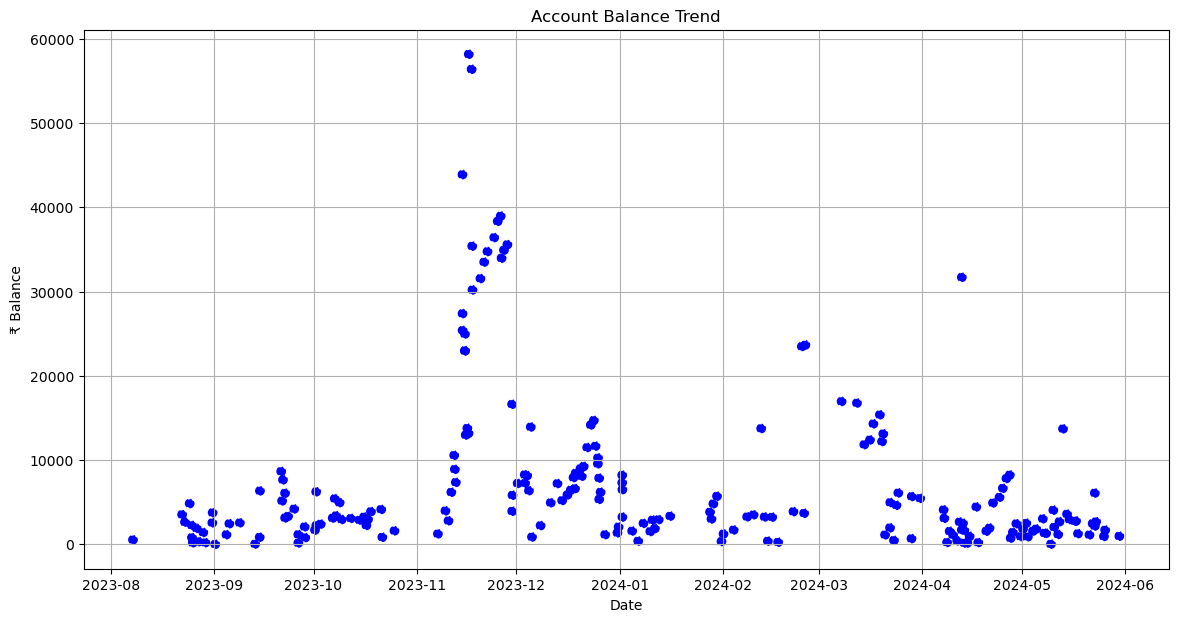

In [7]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'P1- BankStatements.json'
with open(filename, 'r', encoding='utf-8') as BS:
    data = json.load(BS)


timestamps = []
balances = []
currentBalance = float(data["Account"]["Summary"]["currentBalance"])
transactions = data["Account"]["Transactions"]["Transaction"]
threshold = 600

def main(timestamps, balances, transactions):
    for transaction in transactions:
        timestamp = datetime.fromisoformat(transaction["transactionTimestamp"][:-6])
        balance = float(transaction["currentBalance"])
        timestamps.append(timestamp)
        balances.append(balance)

main(timestamps, balances, transactions)


significant_changes = []
for i in range(1, len(balances)):
    threshold = 600
    changes = abs(balances[i] - balances[i - 1])
    if (changes > threshold):
        significant_changes.append((timestamps[i], balances[i]))
if significant_changes:
    print("Periods with significant change")
    for (timestamps, balances) in significant_changes:
        print(f"At {timestamps}: Balance changed to ₹{balances}")
else:
    print("No significant changes observed")

plt.figure(figsize=(14, 7))
plt.scatter(*zip(*significant_changes), color='b', linestyle = '-.', label='Significant Change')
plt.title("Account Balance Trend")
plt.xlabel("Date")
plt.ylabel("₹ Balance")
plt.grid(True)
plt.show()



# Spending Patterns

## Main category of expenses

In [72]:
# To what i have majorly analysed the transactions are basically of 
# these 4 categories only.
transactions = data["Account"]["Transactions"]["Transaction"]
expense_categories = {
    'Fuel': [],
    'ATM': [],
    'UPI': [],
    'Other': [],
}

for transaction in transactions:
    if transaction['type'] == 'DEBIT':
        if transaction['mode'] == 'CARD' and "NEHA FILLING" in transaction["narration"]:
            expense_categories['Fuel'].append(transaction['narration'])
        elif transaction['mode'] == 'ATM':
            expense_categories['ATM'].append(transaction['narration'])
        elif transaction['mode'] == 'UPI':
            expense_categories['UPI'].append(transaction['narration'])
            
#expense_categories.items() returns a tuple of (key, value) pairs where key is the category name
for (category, expenses) in expense_categories.items():
    print(f"In {category} category: No. of transactions are {len(expenses)}")
    if expenses:
        print("  Detail")
        for expense in expenses:
            print(f"  - {expense}")


In Fuel category: No. of transactions are 4
  Detail
  - PRCR/MS NEHA FILLING STATIO/FARRUKHAB
  - PRCR/MS NEHA FILLING STATIO/FARRUKHAB
  - PRCR/MS NEHA FILLING STATIO/FARRUKHAB
  - PRCR/MS NEHA FILLING STATIO/FARRUKHAB
In ATM category: No. of transactions are 3
  Detail
  - ATM/CASH/321917012791/XXXXXXXXXXXX8896
  - ATM/CASH/404414021517/XXXXXXXXXXXX8896
  - ATM/CASH/409910021816/XXXXXXXXXXXX8896
In UPI category: No. of transactions are 688
  Detail
  - UPI/323444770475/080506/UPI/8795417446ybl/Paym
  - UPI/323568910825/081748/UPI/8795417446ybl/Paym
  - UPI/323606328320/133521/UPI/9258641372ybl/Paym
  - UPI/323600260769/214354/UPI/BHARATPE90725406876
  - UPI/323633683779/214801/UPI/Q057618043ybl/Paym
  - UPI/323779418599/102438/UPI/Q201531625ybl/Paym
  - UPI/323723435211/103935/UPI/KAYUMTRADERSicici/
  - UPI/323795135335/120311/UPI/BHARATPE9000335745
  - UPI/360322594403/161502/UPI/paytm-53692591payt
  - UPI/323756969282/161910/UPI/arbazahmad161okici
  - UPI/323737522524/165659/UPI/9

## Analysing the frequency and amount of spending in each category.


In [8]:
import json

filename = 'P1- BankStatements.json'
with open(filename, 'r', encoding='utf-8') as BS:
    data = json.load(BS)

transactions = data['Account']['Transactions']['Transaction']
expense_categories = {
    'FUEL': 0,
    'ATM': 0,
    'UPI': 0,
    'Other': 0,
}

for transaction in transactions:
    transaction_type = transaction['type']
    transaction_mode = transaction['mode']
    narration = transaction['narration']
    amount = float(transaction['amount'])

    if (transaction_type == 'DEBIT'):
        if (transaction_mode == 'CARD') and 'NEHA FILLING' in narration:
            expense_categories['FUEL'] += amount
        elif (transaction_mode == 'ATM'):
            expense_categories['ATM'] += amount
        elif (transaction_mode == 'UPI'):
            expense_categories['UPI'] += amount
        elif (transaction_mode == 'OTHERS'):
            expense_categories['Other'] += amount


for category, total_amount in expense_categories.items():
    print(f"In {category}: the total spending is {total_amount}")
    

In FUEL: the total spending is 830.0
In ATM: the total spending is 13500.0
In UPI: the total spending is 407759.9000000001
In Other: the total spending is 0


# Income Analysis

## Main sources of income

In [28]:
# To what i can majorly see in the json object in transactions
# most of the transactions even in narration doesn't have a specified source of income
# so based on the mode i will categorise each transaction.

income_categories = {
    'UPI': [],
    'ATM': [],
    'OTHERS': [],
    'CARD': [],
}

for transaction in transactions:
    if (transaction['type'] == 'CREDIT'):
        if (transaction['mode'] == 'UPI'):
            income_categories['UPI'].append(transaction['narration'])
        elif (transaction['mode'] == 'ATM'):
            income_categories['ATM'].append(transaction['narration'])
        elif (transaction['mode'] == 'OTHERS'):
            income_categories['OTHERS'].append(transaction['narration'])
        elif (transaction['mode'] == 'CARD'):
            income_categories['CARD'].append(transaction['narration'])

for category, income in income_categories.items():
    print(f"In {category}: the no. of transactions are {len(income)}")
    if (income):
        print("   -  DETAILS")
        for i in income:
            print(f' - {i}')

print("These are all the sources of income.")

In UPI: the no. of transactions are 101
   -  DETAILS
 - UPI/323441197152/114914/UPI/8795417446ybl/Paym
 - UPI/323457106254/122004/UPI/9264998949barodamp
 - UPI/323567840697/105122/UPI/kimoroybl/Payment
 - UPI/323602109737/113218/UPI/9701028466ibl/Paym
 - UPI/323618540670/123136/UPI/9580229953axl/Paym
 - UPI/323628493930/165253/UPI/7479893801ibl/Paym
 - UPI/323679308931/182222/UPI/7731035157ibl/Paym
 - UPI/360354864566/160316/UPI/mayankbhai73590oki
 - UPI/323784208807/161921/UPI/goog-paymentokaxis
 - UPI/323802960783/192600/UPI/9369558521ybl/Paym
 - UPI/323823651280/194229/UPI/rajanbhai271okhdfc
 - UPI/323840766196/203616/UPI/shivampandit199999
 - UPI/323906382845/192938/UPI/atulyadav16469axl/
 - UPI/360922384154/160911/UPI/6393130981paytm/NA
 - UPI/361211837275/181909/UPI/8318404822ybl/Paym
 - UPI/324796646064/121018/UPI/akashk4478oksbi/UP
 - UPI/324834305504/163009/UPI/7310728269ibl/Paym
 - UPI/362682097837/201752/UPI/9140092527ybl/Paym
 - UPI/326459300319/182939/UPI/8178328660ybl/Pa

## Identifying any patterns in the timing and amount of income recieved.

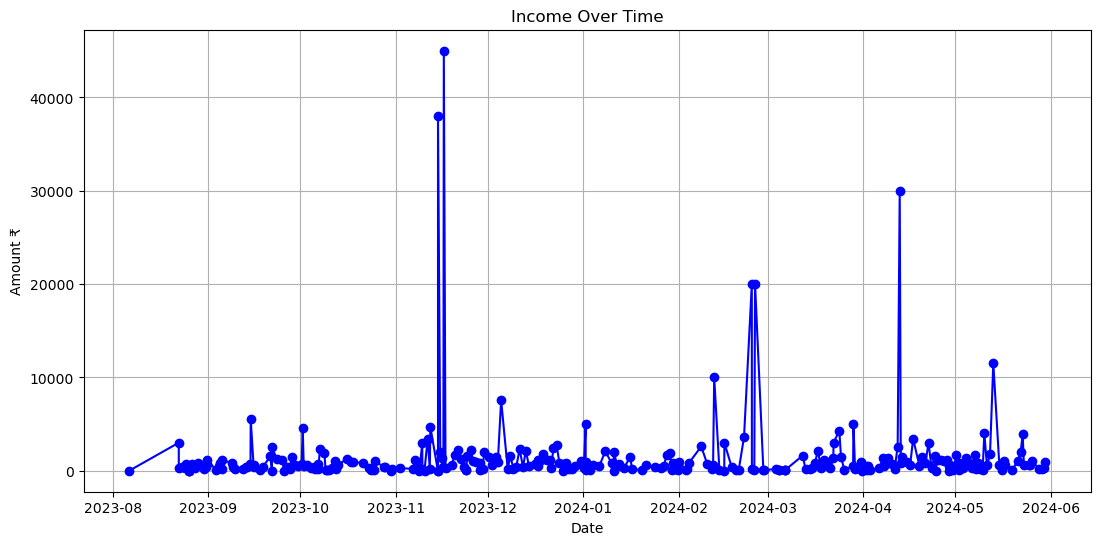

Monthly Income Summary:
month
1     250.05000.0900.0120.070.0600.0550.02100.0790.0...
2     900.058.0200.0800.02600.0750.0200.0590.010000....
3     200.0100.0100.0100.0100.0100.01630.0140.0200.0...
4     500.0100.0500.030.0280.01350.0500.01320.0700.0...
5     1650.047.0860.0320.01380.0800.0250.01700.0150....
8     15.03000.0300.0400.0500.0300.0400.0750.0480.01...
9     34.0460.0850.0200.01100.0850.0350.0200.0180.03...
10    700.04550.0540.0600.0250.0400.0200.0700.0220.0...
11    280.0200.01150.0250.0180.015.02950.0200.010.03...
12    1500.0600.01450.0900.07560.0150.01630.0210.045...
Name: amount, dtype: object

Daily Income Summary:
day
1     700.04550.01500.0250.05000.0900.0120.0900.01650.0
2               540.0280.0600.0500.0100.0500.047.0860.0
3            34.0600.01450.070.058.0200.0200.030.0320.0
4        460.0850.0250.0900.0600.0800.0100.0100.01380.0
5                      200.01100.0400.0200.07560.0800.0
6     15.0700.0220.0200.0550.0100.0100.0100.0280.0250.0
7               233

In [38]:
# was a little confused about the question took the help of chatgpt.
import matplotlib.pyplot as plt
import pandas as pd

credit_txn = [transaction for transaction in transactions if transaction['type'] == 'CREDIT']
df = pd.DataFrame(credit_txn)

df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])

df['date'] = df['transactionTimestamp'].dt.date
df['month'] = df['transactionTimestamp'].dt.month
df['day'] = df['transactionTimestamp'].dt.day
df['hour'] = df['transactionTimestamp'].dt.hour
df['minute'] = df['transactionTimestamp'].dt.minute

plt.figure(figsize=(13, 6))
plt.plot(df['transactionTimestamp'], df['amount'].astype(float), marker='o', linestyle='-', color='b')
plt.title('Income Over Time')
plt.xlabel('Date')
plt.ylabel('Amount ₹')
plt.grid(True)
plt.show()

monthly_income = df.groupby('month')['amount'].sum()
daily_income = df.groupby('day')['amount'].sum()
hourly_income = df.groupby('hour')['amount'].sum()

print("Monthly Income Summary:")
print(monthly_income)
print("\nDaily Income Summary:")
print(daily_income)
print("\nHourly Income Summary:")
print(hourly_income)

# Alert Generation

## Identifying unusual transactions

In [44]:
threshold = 1900
unusual_transactions = df[df['amount'].astype(float) > threshold]
df = pd.DataFrame(transactions)

# Convert transactionTimestamp to datetime
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
def generate_unusual_transaction_alerts():
    alerts = []
    for _, row in unusual_transactions.iterrows():
        alerts.append(f"Unusual transactions alert: {row['amount']} spent on {row['transactionTimestamp']}")
    return alerts

unusual_transations_alerts = generate_unusual_transaction_alerts()
for alert in unusual_transations_alerts:
    print(alert)

Unusual transactions alert: 3000.0 spent on 2023-08-22 11:49:13+05:30
Unusual transactions alert: 2480.0 spent on 2023-08-25 10:24:38+05:30
Unusual transactions alert: 3500.0 spent on 2023-09-01 10:42:42+05:30
Unusual transactions alert: 3000.0 spent on 2023-09-13 10:19:32+05:30
Unusual transactions alert: 5500.0 spent on 2023-09-14 21:14:51+05:30
Unusual transactions alert: 3500.0 spent on 2023-09-21 13:05:06+05:30
Unusual transactions alert: 2500.0 spent on 2023-09-21 19:28:25+05:30
Unusual transactions alert: 2940.0 spent on 2023-09-22 10:44:30+05:30
Unusual transactions alert: 3000.0 spent on 2023-09-26 10:01:36+05:30
Unusual transactions alert: 4550.0 spent on 2023-10-01 19:02:22+05:30
Unusual transactions alert: 4000.0 spent on 2023-10-01 19:51:09+05:30
Unusual transactions alert: 2330.0 spent on 2023-10-07 09:01:11+05:30
Unusual transactions alert: 2000.0 spent on 2023-10-07 18:44:21+05:30
Unusual transactions alert: 2000.0 spent on 2023-10-09 11:24:18+05:30
Unusual transactions

## Generating alerts for low balances or high expenditure periods

In [45]:
df = pd.DataFrame(transactions)

# Ensure amount and currentBalance are floats
df['amount'] = df['amount'].astype(float)
df['currentBalance'] = df['currentBalance'].astype(float)
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])

def generate_alerts(df, low_balance_threshold=500.0, high_expenditure_threshold=1000.0, expenditure_period='1D'):
    alerts = []

    # Check for low balance alerts
    low_balance_alerts = df[df['currentBalance'] < low_balance_threshold]
    for _, row in low_balance_alerts.iterrows():
        alerts.append(f"Low balance alert: Balance of {row['currentBalance']} on {row['transactionTimestamp']}")

    # Check for high expenditure periods
    df.set_index('transactionTimestamp', inplace=True)
    expenditure_sum = df[df['type'] == 'DEBIT']['amount'].resample(expenditure_period).sum()
    high_expenditure_alerts = expenditure_sum[expenditure_sum > high_expenditure_threshold]

    for timestamp, total_expenditure in high_expenditure_alerts.items():
        alerts.append(f"High expenditure alert: {total_expenditure} spent in period starting {timestamp}")

    return alerts

# Generate the alerts
alerts = generate_alerts(df)
for alert in alerts:
    print(alert)

Low balance alert: Balance of 175.8 on 2023-08-25 16:56:59+05:30
Low balance alert: Balance of 145.8 on 2023-08-25 18:23:59+05:30
Low balance alert: Balance of 196.8 on 2023-08-25 18:37:02+05:30
Low balance alert: Balance of 195.8 on 2023-08-26 15:06:16+05:30
Low balance alert: Balance of 315.8 on 2023-08-27 12:19:54+05:30
Low balance alert: Balance of 195.8 on 2023-08-29 11:49:00+05:30
Low balance alert: Balance of 0.8 on 2023-09-01 10:42:42+05:30
Low balance alert: Balance of 34.8 on 2023-09-03 18:19:09+05:30
Low balance alert: Balance of 494.8 on 2023-09-04 12:10:17+05:30
Low balance alert: Balance of 294.8 on 2023-09-04 18:21:45+05:30
Low balance alert: Balance of 29.8 on 2023-09-13 10:19:32+05:30
Low balance alert: Balance of 429.8 on 2023-09-13 19:25:01+05:30
Low balance alert: Balance of 289.8 on 2023-09-14 10:18:25+05:30
Low balance alert: Balance of 169.8 on 2023-09-14 10:24:31+05:30
Low balance alert: Balance of 153.8 on 2023-09-26 10:03:39+05:30
Low balance alert: Balance of